<a href="https://colab.research.google.com/github/Al-Ashir-Intisar/minneMUDAC2025/blob/main/training_files/initial_model_training_multiple_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import os

In [79]:
training_data_path = input("Enter the drive path of training data: ")

Enter the drive path of training data: /content/drive/Shareddrives/minneMUDAC2025/Data/combined_complete_df.csv


In [80]:
training_df = pd.read_csv(training_data_path).drop(columns=["Little ID", "Big ID", "Match ID 18Char", "Days Match Activation to Note Completion avg"])
col = training_df.pop("match_length")
training_df.insert(0, "match_length", col)
training_df.head()

,match_length,Big Days Acceptance to Match,Big Days Interview to Acceptance,Big Days Interview to Match,Big Days Approved to Match,Days Big Assesment Uploaded to Match,Big Days Contact Created to Match,Big Days Enrollment to Match,Days Match Activation to Closure Meeting Date,Days Little Acceptance to Match Activation Date,...,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,mean_cadence
0,9.0,0,0,0,0,0,0,0,273,0,...,7,0,333,3,24,164,10,90,261,27.333333
1,9.0,0,0,0,0,0,0,0,273,0,...,7,0,333,3,24,164,10,90,261,27.333333
2,46.1,0,0,0,1,0,0,0,0,0,...,441,271,2316,265,340,1959,1014,1265,1377,72.789474
3,6.2,0,0,0,0,0,0,0,190,0,...,25,5,75,9,27,47,9,36,64,34.400000
4,85.6,0,0,0,9,0,0,0,0,0,...,578,1501,11777,281,2126,7859,388,2959,11632,73.028571


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
correlation_mat = training_df.corr().round(2)
print(correlation_mat)


                                  match_length  Big Days Acceptance to Match  \
match_length                              1.00                         -0.06   
Big Days Acceptance to Match             -0.06                          1.00   
Big Days Interview to Acceptance         -0.08                          0.11   
Big Days Interview to Match              -0.10                          0.82   
Big Days Approved to Match               -0.09                          0.04   
...                                        ...                           ...   
joy                                       0.45                          0.04   
sadness                                   0.42                         -0.01   
surprise                                  0.37                          0.02   
trust                                     0.45                          0.01   
mean_cadence                              0.55                         -0.05   

                                  Big D

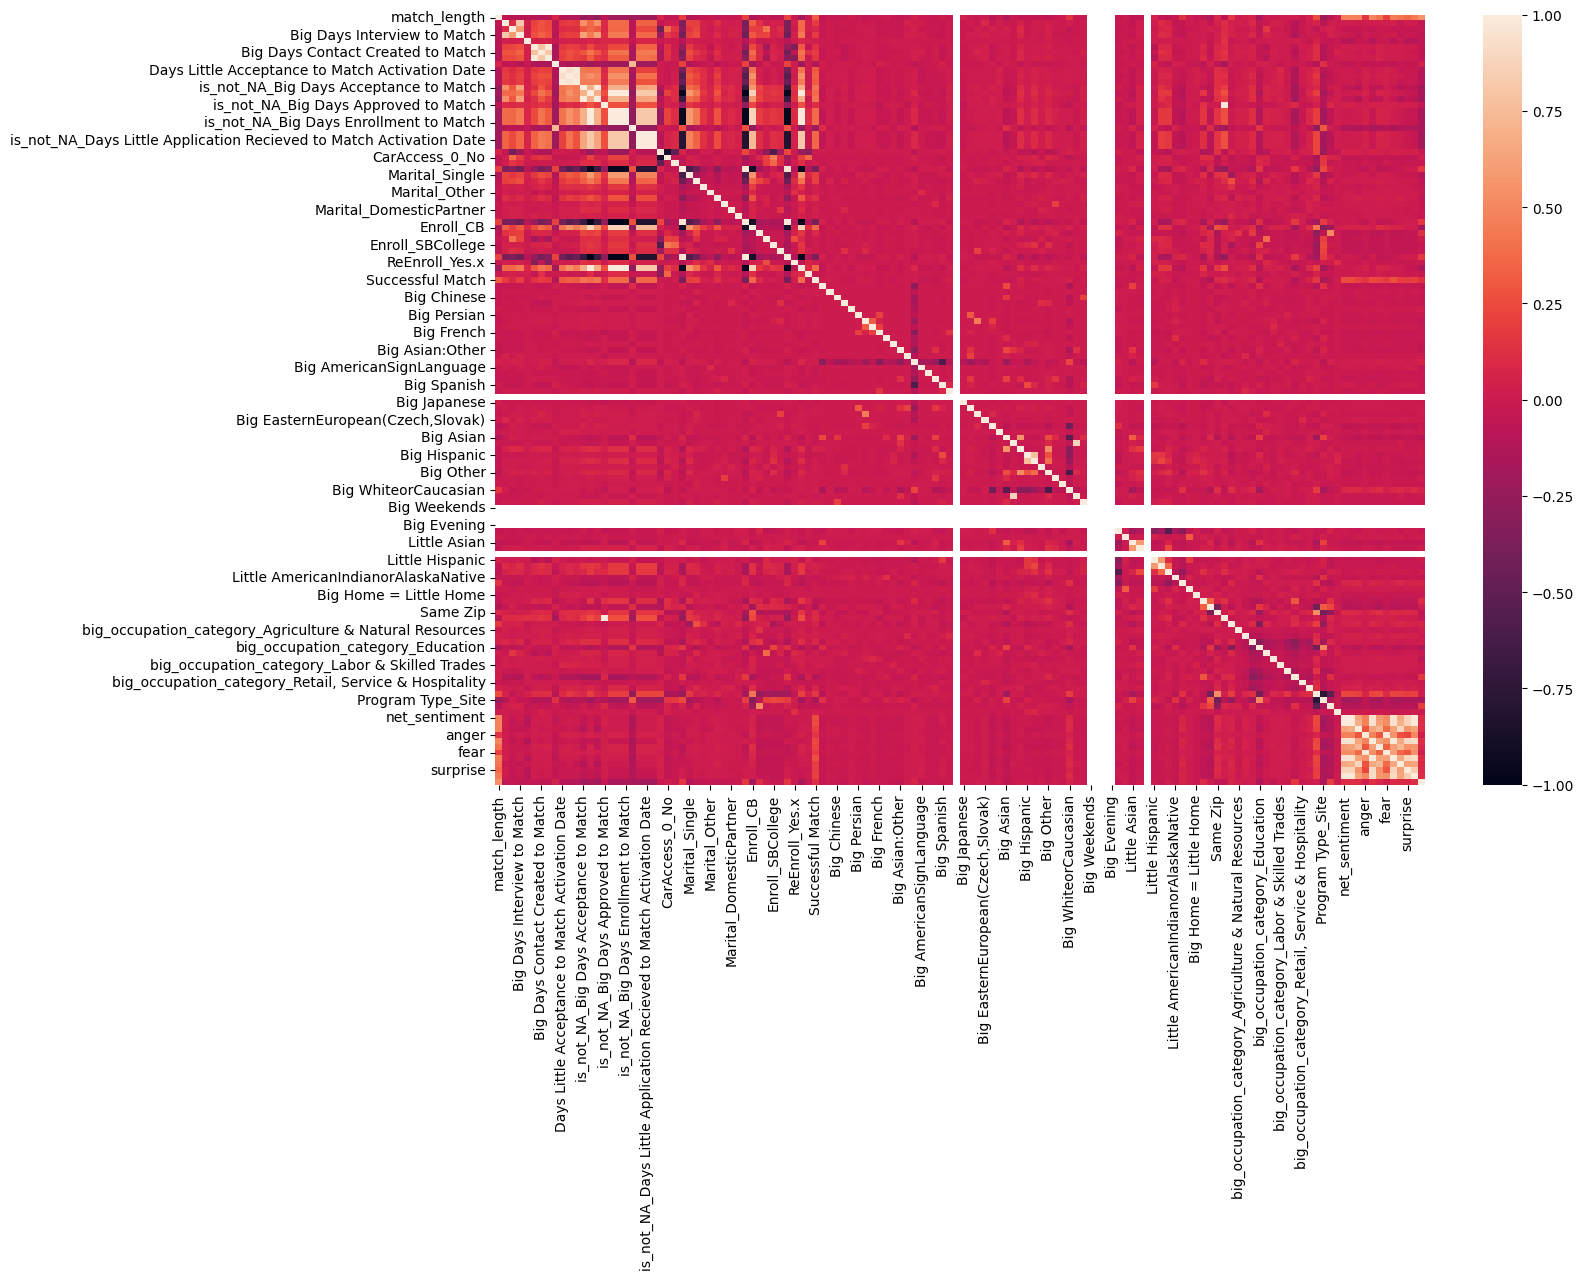

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat)
plt.show()

# create paiplot of subset of features correlation

In [ ]:
# explore the correlation between successful match and the anger fear surprise sentiment variables


In [84]:
correlation_mat.index

Index(['match_length', 'Big Days Acceptance to Match',
       'Big Days Interview to Acceptance', 'Big Days Interview to Match',
       'Big Days Approved to Match', 'Days Big Assesment Uploaded to Match',
       'Big Days Contact Created to Match', 'Big Days Enrollment to Match',
       'Days Match Activation to Closure Meeting Date',
       'Days Little Acceptance to Match Activation Date',
       ...
       'negative', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'mean_cadence'],
      dtype='object', length=132)

In [85]:
from sklearn.linear_model import Lasso, Ridge

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# add cross validation

x_train, x_test, y_train, y_test = train_test_split(training_df.drop(columns=["match_length"]), training_df["match_length"], test_size=0.2, random_state=42)

In [88]:
# do hyper parameter tuning

lasso_model_alpha0p5 = Lasso(alpha=0.5)
lasso_model_alpha0p5.fit(x_train, y_train)

print(f"Lasso (alpha 0.5): {lasso_model_alpha0p5.coef_[:]}")

Lasso (alpha 0.5): [ 6.78067430e-03  0.00000000e+00 -5.00101579e-03 -3.91160609e-03
  5.25318807e-03 -3.66806477e-03 -6.87540086e-03  5.93922570e-03
  3.14756087e-03 -1.47676693e-02  8.68228583e-03 -2.28908024e+00
 -0.00000000e+00 -4.29603233e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.58325686e+00 -0.00000000e+00
 -7.34859854e-01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  7.16528595e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.808e+02, tolerance: 9.934e+01
  model = cd_fast.enet_coordinate_descent(


In [90]:
import numpy as np

In [91]:
coefficients = lasso_model_alpha0p5.coef_
non_zero_coefficients = coefficients[np.abs(coefficients) > 1e-10] # Adjust tolerance as needed
non_zero_indices = np.where(np.abs(coefficients) > 1e-10)[0]

print("Non-zero coefficients:")
for coef, index in zip(non_zero_coefficients, non_zero_indices):
  print(f"Feature {x_train.columns[index]}: {coef}")

Non-zero coefficients:
Feature Big Days Acceptance to Match: 0.006780674296408609
Feature Big Days Interview to Match: -0.005001015793793439
Feature Big Days Approved to Match: -0.00391160608650517
Feature Days Big Assesment Uploaded to Match: 0.005253188066197527
Feature Big Days Contact Created to Match: -0.003668064768507826
Feature Big Days Enrollment to Match: -0.0068754008566116066
Feature Days Match Activation to Closure Meeting Date: 0.005939225698512095
Feature Days Little Acceptance to Match Activation Date: 0.0031475608744133262
Feature Days Little Application Recieved to Match Activation Date: -0.014767669264287474
Feature Days Little Interview to Match Activation Date: 0.00868228583460204
Feature is_not_NA_Big Days Acceptance to Match: -2.2890802383359863
Feature is_not_NA_Big Days Interview to Match: -0.4296032326646046
Feature is_not_NA_Days Match Activation to Closure Meeting Date: -2.583256859923633
Feature is_not_NA_Days Little Application Recieved to Match Activation

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
y_pred_train = lasso_model_alpha0p5.predict(x_train)
y_pred_test = lasso_model_alpha0p5.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"Training MSE: {mse_train}")
print(f"Testin MSE: {mse_test}")
print(f"Training RMSE: {rmse_train}")
print(f"Testin RMSE: {rmse_test}")
print(f"Training R^2: {r2_train}")
print(f"Testin R^2: {r2_test}")

Training MSE: 128.7111614207491
Testin MSE: 140.7718498218697
Training RMSE: 11.345094156539606
Testin RMSE: 11.86473134216994
Training R^2: 0.6705211936585173
Testin R^2: 0.6268383405865144


In [ ]:
# create a smaller feature pool and create a model
# replace match activation to note completion days variable with mean_cadence


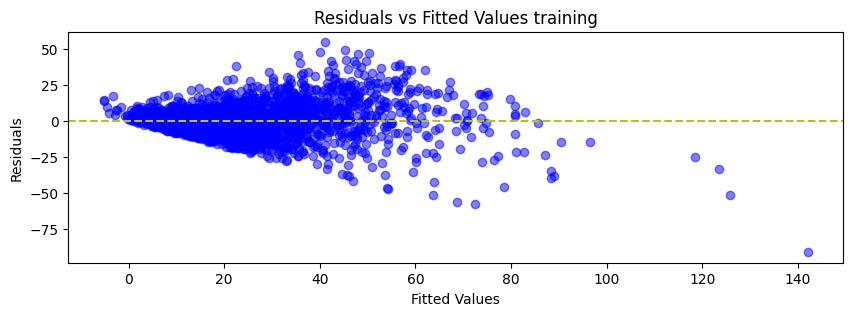

In [93]:
# Compute residuals
residuals_train = y_train - y_pred_train # Use y_train and y_pred_train

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values training')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

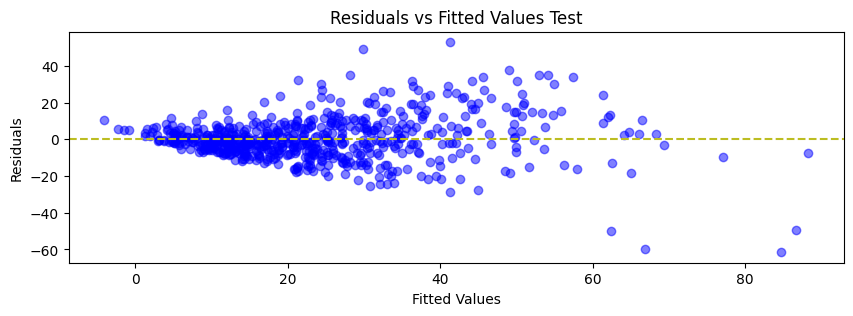

In [94]:
# Compute residuals
residuals_test = y_test - y_pred_test

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values Test')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

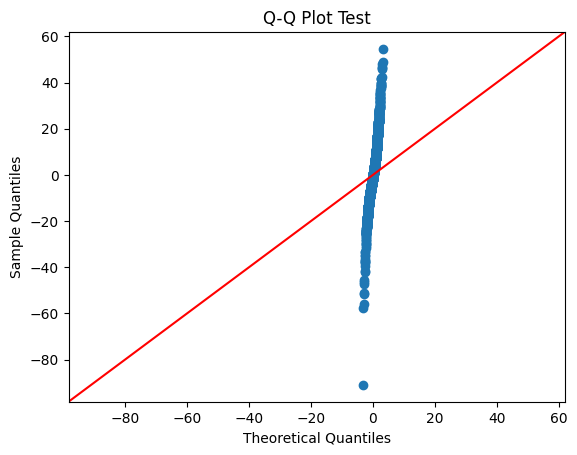

In [95]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(residuals_train, line ='45')
plt.title('Q-Q Plot Test')
plt.show()

<Figure size 1000x600 with 0 Axes>

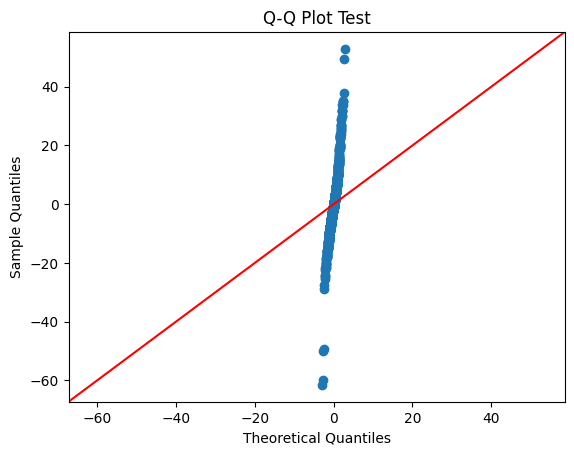

In [96]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_test, line ='45')
plt.title('Q-Q Plot Test')
plt.show()

In [97]:
# Using gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor


# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(x_train, y_train)

# Predict
y_pred = gbr.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 7.005
R²: 0.870


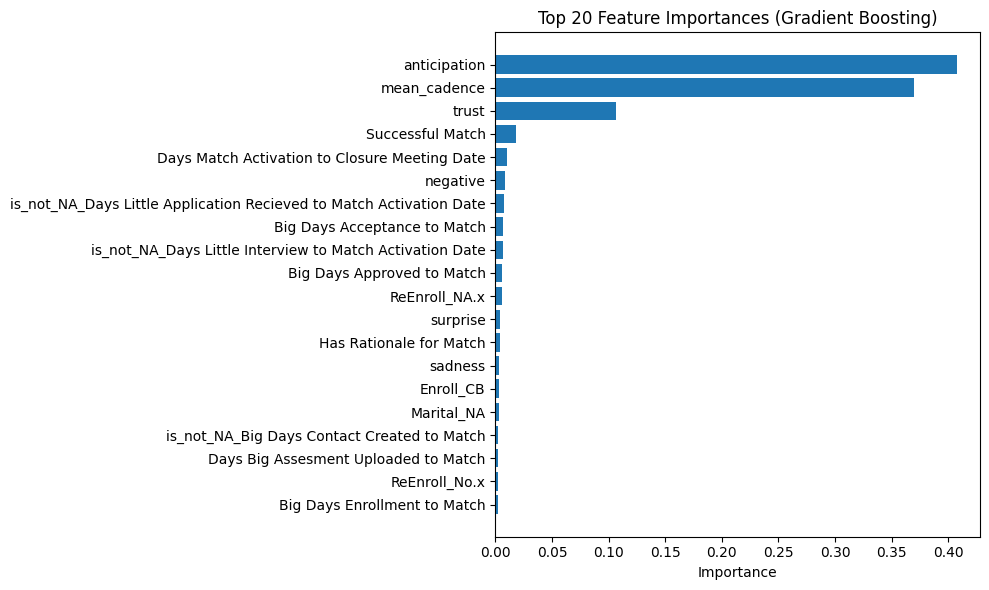

In [98]:
# Get feature importances
importances = gbr.feature_importances_
features = x_train.columns

# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Keep only the top 20
top_20 = importance_df.head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_20['Feature'], top_20['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
# create variable called full alignment, partial alignment, and no alignment

In [ ]:
# plot match length vs cadence mean
# do a distribution plot and then categorize them into blovks